<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/randomterrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Terrain Generator

## Inevitable Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt


## Class Taken from [here](https://github.com/hnhaefliger/pyTerrain/blob/master/perlin.py)

In [0]:
import math, random

class noise:
    def lerp(self, a0, a1, w):
        return a0 + w * (a1 - a0)

    def dotGridGradient(self, ix, iy, x, y):
        dx = x - ix
        dy = y - iy
        return dx * self.gradients[iy][ix][0] + dy * self.gradients[iy][ix][1]

    def __init__(self, x, y):
        x, y = math.ceil(x) + 1, math.ceil(y) + 1
        self.gradients = []
        for j in range(y):
            self.gradients.append([])
            for i in range(x):
                a = random.uniform(0, 1)
                b = math.sqrt(1 - a ** 2)
                c = [-1, 1][random.randint(0,1)]
                d = [-1, 1][random.randint(0,1)]
                self.gradients[j].append([a * c, b * d])

    def perlin(self, x, y):
        x0 = int(x)
        x1 = x0 + 1
        y0 = int(y)
        y1 = y0 + 1
        
        sx = x - x0
        sy = y - y0

        n0 = self.dotGridGradient(x0, y0, x, y)
        n1 = self.dotGridGradient(x1, y0, x, y)
        ix0 = self.lerp(n0, n1, sx)

        n0 = self.dotGridGradient(x0, y1, x, y)
        n1 = self.dotGridGradient(x1, y1, x, y)
        ix1 = self.lerp(n0, n1, sx)

        value = self.lerp(ix0, ix1, sy)
        return value



https://medium.com/quick-code/generating-random-3d-terrain-with-python-c344ae16e5c1



In [0]:
width = 10
length = 10

mynoise = noise(width + 1, length + 1)
frequency = 30
amplitude = 20

n1div = 30 # landmass distribution
n2div = 4 # boulder distribution
n3div = 1 # rock distribution

n1scale = 20 # landmass height
n2scale = 2 # boulder scale
n3scale = 1 # rock scale

noise1 = noise(width / n1div, length / n1div) # landmass / mountains
noise2 = noise(width / n2div, length / n2div) # boulders
noise3 = noise(width / n3div, length / n3div) # rocks

In [12]:
def getTerrainAll(width, length):
    zroot = 2
    zpower = 2.5
    result = []
    for y in range(-int(length/2), int(length/2)):
        row = []
        for x in range(-int(width/2), int(width/2)):
            x1 = x + width/2 
            y1 = y + length/2
            z = noise1.perlin(x1 / n1div, y1 / n1div) * n1scale # add landmass
            z += noise2.perlin(x1 / n2div, y1 / n2div) * n2scale # add boulders
            z += noise3.perlin(x1 / n3div, y1 / n3div) * n3scale # add rocks
            if z >= 0:
                z = -math.sqrt(z)
            else:
                z = ((-z) ** (1 / zroot)) ** zpower
            #row.append([x, y, z]) 
            row.append(z)
        result.append(row)
    return result

terrain = getTerrainAll(width, length)
for _ in terrain:
  print(_)


[-0.0, -0.8061708664403571, -1.0694520864822292, -1.2171478538583524, -1.2896025994505416, -1.359826180625156, -1.450185489553731, -1.5571791811815947, -1.6776276065006677, -1.8160860328354085]
[0.05991759813901039, -0.4600281030277741, -0.6533886356827752, -0.7352998247839618, -0.7435544531768419, -0.9034064176964244, -1.033285282444946, -1.1434505599219633, -1.239171206791314, -1.3109142953683157]
[0.5840646884585988, 0.4546904589892503, 0.38011530689155515, 0.3554677421777555, 0.37889649753707416, 0.06726145912343703, -0.3713902549726093, -0.5476639507073678, -0.6087801952249584, -0.5632010505341112]
[1.8495757484839226, 1.77411840020547, 1.688789848435136, 1.593927884758835, 1.489933780509753, 0.9323554160624821, 0.6245505425479908, 0.5256732768475858, 0.6179091728862653, 0.8835902418099225]
[4.048231888688224, 3.84516829933995, 3.543940487100074, 3.149775120931121, 2.670415927304439, 1.9043688753613477, 1.52929377384113, 1.5035738765434619, 1.823957821756534, 2.3047543560057533]
[

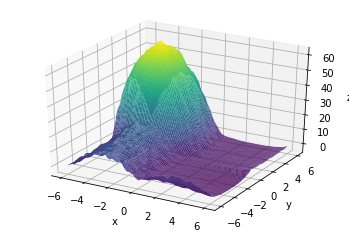

In [65]:
import numpy as np

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def getTerrain(X, Y, ndiv = [30, 4, 1], nscale = [10, 2, 1]):
    zroot = 2
    zpower = 2.5
    width = len(X[0])
    length = len(X)

    n1div = ndiv[0]#30 # landmass distribution
    n2div = ndiv[1]#4 # boulder distribution
    n3div = ndiv[2]#1 # rock distribution

    n1scale = nscale[0]#20 # landmass height
    n2scale = nscale[1]#2 # boulder scale
    n3scale = nscale[2]#1 # rock scale

    noise1 = noise(width / n1div, length / n1div) # landmass / mountains
    noise2 = noise(width / n2div, length / n2div) # boulders
    noise3 = noise(width / n3div, length / n3div) # rocks  

    result = []
    for row in range(length):
        resultRow = []
        for column in range(width):
            x1 = column#X[row, column]
            y1 = row#Y[row, column]#y + length/2
            z = noise1.perlin(x1 / n1div, y1 / n1div) * n1scale # add landmass
            z += noise2.perlin(x1 / n2div, y1 / n2div) * n2scale # add boulders
            z += noise3.perlin(x1 / n3div, y1 / n3div) * n3scale # add rocks
            if z >= 0:
                z = -math.sqrt(z)
            else:
                z = ((-z) ** (1 / zroot)) ** zpower
            #row.append([x, y, z]) 
            resultRow.append(z)
        result.append(np.array(resultRow))
    return np.array(result)


x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
#Z = f(X, Y)
Z = getTerrain(X, Y, ndiv = [50, 4, 1], nscale = [50, 2, 1])

#for item in Z:
#  print(item)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50)#, cmap='binary')
#ax.plot_surface(X, Y, Z, 50)#, cmap='binary')
ax.plot_surface(X, Y, Z, 
  rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#ax.view_init(60, 35)


https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html